## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression

## Datos

In [5]:
df = pd.read_csv('Datos/diabetes.csv', index_col=0)

In [6]:
df.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
model = LogisticRegression(max_iter=1000)

In [10]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

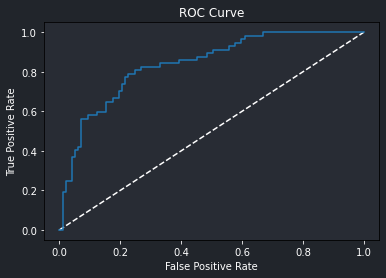

In [13]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('#21252b')
ax.set_facecolor('#282c34')

plt.title('ROC Curve', color='white')

plt.plot([0,1], [0,1], '--', color='white')
plt.plot(fpr, tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate', color='white')
plt.ylabel('True Positive Rate', color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tick_params(axis='x', color='white')
plt.tick_params(axis='y', color='white')

plt.show()

**AUC**

In [15]:
roc_auc_score(y_test, y_pred_prob)

0.8383071079761258

**AUC y Cross Validation**

In [18]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

In [20]:
cv_scores.mean()

0.8326575821104122